# Complete LangGraph Workflow

In [3]:
import os

# Get the directory of the current notebook
notebook_dir = os.path.dirname(os.path.abspath("__file__"))

# Set the working directory to the project root (one level up from the notebook directory)
project_root = os.path.join(notebook_dir, os.pardir)
os.chdir(project_root)

# You can verify the new working directory
print(f"Current Working Directory: {os.getcwd()}")

Current Working Directory: /home/timpi/Projects/thesis/multi_agent_supply_chain_optimization


In [8]:
import json
from langgraph_sensitivity_analysis import SensitivityAnalysisState, app, BASELINE_OBJ, print_workflow_graph

In [5]:
# Define the initial state for the sensitivity analysis workflow
initial_state = SensitivityAnalysisState(
    baseline_objective=BASELINE_OBJ,
    scenario_log=[],
    proposed_scenario=None,
    code_modification=None,
    execution_result=None,
    max_iterations=20, # Set the number of scenarios to run
    current_iteration=0,
    error_message=None,
    final_analysis_summary=None
)

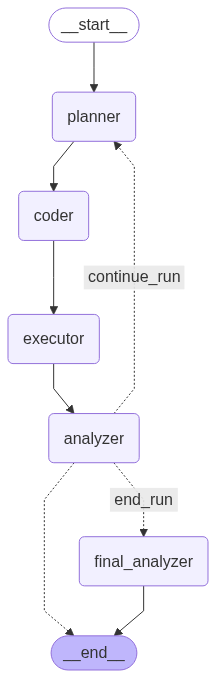

In [10]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
# Run the LangGraph workflow
print("Starting Automated Sensitivity Analysis...")
final_state = app.invoke(initial_state, config={"recursion_limit": 100})
print("Analysis Complete.")

Starting Automated Sensitivity Analysis...
--- Running Planner Node ---
Proposed Scenario: Increase the fixed costs of all facilities by 50%, as this could significantly impact the total cost and feasibility by making it less attractive to open certain facilities.
--- Running Coder Node ---
Generated Code Modification (String): { "ADD DATA": "fixed_costs = [fc * 1.50 for fc in fixed_costs]" }
Parsed Code Modification (Dict): {'ADD DATA': 'fixed_costs = [fc * 1.50 for fc in fixed_costs]'}
--- Running Execute Node ---
Executing model with modification: {'ADD DATA': 'fixed_costs = [fc * 1.50 for fc in fixed_costs]'}

log - Running optimization model...

log - Executing model source code...

log - Model execution completed.

log - Extracting optimization results...

log - Optimization results extracted.
Logging run 'utils_main_test_20250521_182230' to 'utils_main_run_log.csv'...
Run 'utils_main_test_20250521_182230' logged successfully to utils_main_run_log.csv

log - Optimization Complete

In [7]:
# Display the final state and analysis summary
print("\n--- Final Analysis Summary ---")
print(final_state.get('final_analysis_summary', 'No summary available.'))

print("\n--- Scenario Log ---")
for entry in final_state.get('scenario_log', []):
    print(entry)

print("\n--- Full Final State ---")
print(json.dumps(final_state, indent=2, default=str))


--- Final Analysis Summary ---
**1. Summarize Key Findings:**

The sensitivity analysis of the Capacitated Facility Location Problem (CFLP) model reveals that changes in facility capacities and customer demands have the most significant impact on total costs. Specifically, drastic reductions in facility capacities and substantial increases in customer demands consistently lead to large increases in total costs. Conversely, increasing facility capacities or decreasing fixed costs can significantly reduce total costs. Interestingly, despite the potential for infeasibility, all scenarios remained optimal, indicating robust model feasibility under the tested conditions.

**2. Rank Parameter/Change Type Sensitivity:**

1. **Facility Capacities:**
   - Drastic reductions in capacities (e.g., 60% or more) lead to the largest increases in total costs, with ΔObj % reaching up to 90.4%.
   - Scenarios 16 and 15 showed the highest cost increases due to capacity reductions.

2. **Customer Demand 